# Section: Ball Throw

Adapted from: [https://github.com/gjbex/Fortran-MOOC/tree/master/source_code/ball_throw](https://github.com/gjbex/Fortran-MOOC/tree/master/source_code/ball_throw)

This program demonstrates using the Runge-Kutta method to solve a second order differential equation. The equations of motion for a ball are analyzed.

## Runge-Kutta Method Explanation by ChatGPT 4o

Let's break down the physical equations governing the motion of the ball, how they are discretized using the Runge-Kutta 4th order (RK4) method, and how the motion of the ball is simulated step-by-step in the code.

### **1. Physical Model (Equations of Motion)**

The ball is subject to gravity, and we are solving for its trajectory. This can be modeled by the following system of **ordinary differential equations (ODEs)**:

#### State Variables:
- **Position in x**: $ X(t) $
- **Position in y**: $ Y(t) $
- **Velocity in x**: $ V_X(t) $
- **Velocity in y**: $ V_Y(t) $

#### Equations of Motion:
The motion of the ball is governed by Newton’s laws of motion. The system of equations is:

1. **Velocity equations** (derivatives of position):
   $$
   \frac{dX}{dt} = V_X(t)
   $$
   $$
   \frac{dY}{dt} = V_Y(t)
   $$

2. **Acceleration equations** (derivatives of velocity):
   $$
   \frac{dV_X}{dt} = 0 \quad (\text{No horizontal acceleration due to air resistance})
   $$
   $$
   \frac{dV_Y}{dt} = -g = -9.81 \, \text{m/s}^2 \quad (\text{Acceleration due to gravity})
   $$

So the full system of ODEs can be written as:

$$
\frac{d}{dt} \begin{bmatrix} X \\ Y \\ V_X \\ V_Y \end{bmatrix} = \begin{bmatrix} V_X \\ V_Y \\ 0 \\ -g \end{bmatrix}
$$

Where:
- $ X(t) $ and $ Y(t) $ are the positions in the horizontal and vertical directions.
- $ V_X(t) $ and $ V_Y(t) $ are the velocities in the horizontal and vertical directions.
- $ g = 9.81 \, \text{m/s}^2 $ is the acceleration due to gravity.

### **2. Discretization of the Equations Using the Runge-Kutta Method**

The Runge-Kutta 4th order method (RK4) is a numerical method for solving ordinary differential equations. It approximates the solution by calculating intermediate values of the derivatives at multiple points within a time step and combining them to achieve a higher-order approximation.

The system of ODEs can be written as:

$$
\frac{d\mathbf{u}}{dt} = \mathbf{f}(t, \mathbf{u})
$$

Where $ \mathbf{u}(t) $ is the vector of state variables, $ \mathbf{u}(t) = \begin{bmatrix} X(t) \\ Y(t) \\ V_X(t) \\ V_Y(t) \end{bmatrix} $, and $ \mathbf{f}(t, \mathbf{u}) $ is the f function, which is computed by the `f` subroutine.

In your program, the equations of motion are:

$$
\mathbf{f}(t, \mathbf{u}) = \begin{bmatrix} V_X \\ V_Y \\ 0 \\ -g \end{bmatrix}
$$

#### Step 1: The Runge-Kutta Method

The RK4 method computes the next state vector $ \mathbf{u}(t + \Delta t) $ by evaluating the derivatives at four points within the time step $ \Delta t $ and then combining them. Here's the mathematical formulation:

Let $ t_0 $ be the current time, and $ \mathbf{u}_0 $ be the current state vector. The Runge-Kutta 4th order method computes the next state $ \mathbf{u}_1 $ at $ t_0 + \Delta t $ as:

$$
k_1 = \Delta t \, \mathbf{f}(t_0, \mathbf{u}_0)
$$
$$
k_2 = \Delta t \, \mathbf{f}\left(t_0 + \frac{\Delta t}{2}, \mathbf{u}_0 + \frac{k_1}{2}\right)
$$
$$
k_3 = \Delta t \, \mathbf{f}\left(t_0 + \frac{\Delta t}{2}, \mathbf{u}_0 + \frac{k_2}{2}\right)
$$
$$
k_4 = \Delta t \, \mathbf{f}(t_0 + \Delta t, \mathbf{u}_0 + k_3)
$$

The new state vector $ \mathbf{u}_1 $ is given by a weighted sum of these intermediate values:

$$
\mathbf{u}_1 = \mathbf{u}_0 + \frac{1}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right)
$$

This formula combines the values at four points: the beginning of the step, the midpoint (evaluated twice), and the end of the step.

#### Step 2: Applying the RK4 Method to Your System

Now, let's apply the RK4 method to your system of equations.

The state vector is:
$$
\mathbf{u} = \begin{bmatrix} X \\ Y \\ V_X \\ V_Y \end{bmatrix}
$$

The RHS function is:
$$
\mathbf{f}(t, \mathbf{u}) = \begin{bmatrix} V_X \\ V_Y \\ 0 \\ -g \end{bmatrix}
$$

We need to calculate the four approximations ( $ k_1 $, $ k_2 $, $ k_3 $, and $ k_4 $ ) for each of the state variables:

1. **At the current state $ t_0 $, $ \mathbf{u}_0 $**:
   $$
   k_1 = \Delta t \, \begin{bmatrix} V_X \\ V_Y \\ 0 \\ -g \end{bmatrix}
   $$

2. **At the midpoint $ t_0 + \frac{\Delta t}{2} $, using $ k_1 $ to update $ \mathbf{u}_0 $**:
   $$
   k_2 = \Delta t \, \begin{bmatrix} V_X + \frac{k_1(3)}{2} \\ V_Y + \frac{k_1(4)}{2} \\ 0 \\ -g \end{bmatrix}
   $$

3. **At the midpoint again, $ t_0 + \frac{\Delta t}{2} $, using $ k_2 $ to update $ \mathbf{u}_0 $**:
   $$
   k_3 = \Delta t \, \begin{bmatrix} V_X + \frac{k_2(3)}{2} \\ V_Y + \frac{k_2(4)}{2} \\ 0 \\ -g \end{bmatrix}
   $$

4. **At the end of the step $ t_0 + \Delta t $, using $ k_3 $ to update $ \mathbf{u}_0 $**:
   $$
   k_4 = \Delta t \, \begin{bmatrix} V_X + k_3(3) \\ V_Y + k_3(4) \\ 0 \\ -g \end{bmatrix}
   $$

#### Final Update:
Finally, the updated state $ \mathbf{u}_1 $ is calculated as:

$$
\mathbf{u}_1 = \mathbf{u}_0 + \frac{1}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right)
$$

For each component (X, Y, $ V_X $, $ V_Y $), you apply this formula, updating the state vector by adding the weighted sum of the intermediate steps.

---

### **3. Discretization of the Motion**

#### X and Y (Position):

1. For position $ X $, the derivative is $ \frac{dX}{dt} = V_X $.
2. For position $ Y $, the derivative is $ \frac{dY}{dt} = V_Y $.

At each step, the velocities $ V_X $ and $ V_Y $ are updated, so the positions $ X $ and $ Y $ are updated based on the velocities.

#### $ V_X $ (Velocity in x-direction):
- The velocity in the x-direction $ V_X $ remains constant (no acceleration in the x-direction):
  $$
  \frac{dV_X}{dt} = 0
  $$
  This means that $ V_X $ doesn't change during the simulation.

#### $ V_Y $ (Velocity in y-direction):

- The velocity in the y-direction is affected by gravity:
  $$
  \frac{dV_Y}{dt} = -g
  $$
  The velocity $ V_Y $ decreases over time due to the downward acceleration caused by gravity.

---

### **Summary of the Process**

1. **The ODE system** describes the motion of the ball in both the horizontal and vertical directions, with the velocities and positions evolving over time.
2. **The RK4 method** discretizes these continuous equations into small steps of size $ \Delta t $. For each step, the

 Runge-Kutta method computes intermediate derivatives and combines them to provide an accurate approximation of the solution at the next time step.
3. **The results** provide the trajectory of the ball, showing how its position and velocity change over time, under the influence of gravity.

This process gives a numerically computed trajectory of the ball thrown at an initial velocity, providing insight into its motion and behavior as time progresses.

## Code Analysis by ChatGPT 4o

Let's break down the Fortran code in great detail. The program simulates the motion of a ball under the influence of gravity using the fourth-order Runge-Kutta (RK4) method for solving ordinary differential equations (ODEs). Here's a detailed explanation of each module and subroutine:

### 1. **Main Program: `ball_throw`**

This is the top-level program that integrates the motion of a ball thrown with initial velocity using RK4.

```fortran
program ball_throw
    use, intrinsic :: iso_fortran_env, only : DP => real64, int32
    use :: f_mod, only : f
    use :: rk4_mod, only  : rk4vec
    use :: vector_indices_mod, only : X_IDX, Y_IDX, VX_IDX, VY_IDX
    implicit none
    integer, parameter :: NR_EQS = 4
    integer, parameter :: MAX_STEPS = 10000
    real(kind=DP), parameter :: DELTA_T = 0.01_DP
    real(kind=DP) :: t
    real(kind=DP), dimension(NR_EQS) :: u, u_new
    integer :: step
```

- **Imports**: 
  - `iso_fortran_env` provides `real64` (double precision) and `int32` (32-bit integer) types to ensure consistency in floating-point and integer precision.
  - `f_mod` imports the function `f`, which represents the differential equations governing the ball's motion.
  - `rk4_mod` imports the subroutine `rk4vec`, which will perform the RK4 integration.
  - `vector_indices_mod` provides the indices for the state vector components: `X_IDX`, `Y_IDX`, `VX_IDX`, and `VY_IDX`.

- **Parameters**:
  - `NR_EQS`: The number of equations (4, corresponding to position and velocity in both x and y directions).
  - `MAX_STEPS`: The maximum number of integration steps.
  - `DELTA_T`: The time step for the RK4 integration (0.01 seconds).
  
- **State Vector** (`u`):
  - This vector holds the state variables: position in `x` and `y` (`X_IDX`, `Y_IDX`), and velocity in `x` and `y` (`VX_IDX`, `VY_IDX`).
  
- **Initial Setup**:
  - `step` is the step counter.
  - The initial conditions for the ball are set:
    - `u(X_IDX) = 0.0_DP`: The initial `x` position is 0.
    - `u(Y_IDX) = 0.0_DP`: The initial `y` position is 0.
    - `u(VX_IDX) = 5.0_DP`: The initial velocity in the `x` direction is 5 m/s.
    - `u(VY_IDX) = 5.0_DP`: The initial velocity in the `y` direction is 5 m/s.

### 2. **Main Loop**:

```fortran
    step = 0
    t = 0.0_DP
    u(X_IDX) = 0.0_DP
    u(Y_IDX) = 0.0_DP
    u(VX_IDX) = 5.0_DP
    u(VY_IDX) = 5.0_DP
    print *, step, t, u(X_IDX), u(Y_IDX), u(VX_IDX), u(VY_IDX)

    do step = 1, MAX_STEPS
        call rk4vec(t, NR_EQS, u, DELTA_T, f, u_new)
        t = t + DELTA_T
        u = u_new
        if (u(Y_IDX) < 0.0_DP) exit
        print *, step, t, u(X_IDX), u(Y_IDX), u(VX_IDX), u(VY_IDX)
    end do
```

- **Initial Print**: The initial values are printed out, showing the time `t`, the `step`, and the state vector components (`x`, `y`, `vx`, `vy`).
  
- **Integration Loop**:
  - The loop runs from `step = 1` to `MAX_STEPS`, performing the RK4 integration for each time step.
  - `rk4vec` is called to integrate the state vector `u` for one step, updating the values in `u_new`.
  - The time `t` is incremented by the step size `DELTA_T`.
  - The state vector `u` is updated with the new values from `u_new`.
  - The loop exits if the ball's `y` position (`u(Y_IDX)`) becomes negative, indicating it has hit the ground.
  - After each step, the current time and state vector are printed.

### 3. **Module: `vector_indices_mod`**

```fortran
module vector_indices_mod
    implicit none
    private
    public :: X_IDX, Y_IDX, VX_IDX, VY_IDX
    integer, parameter :: X_IDX = 1
    integer, parameter :: Y_IDX = 2
    integer, parameter :: VX_IDX = 3
    integer, parameter :: VY_IDX = 4
end module vector_indices_mod
```

- This module defines constants representing the indices of the components of the state vector (`u`):
  - `X_IDX = 1`: The index for the `x` position.
  - `Y_IDX = 2`: The index for the `y` position.
  - `VX_IDX = 3`: The index for the `x` velocity.
  - `VY_IDX = 4`: The index for the `y` velocity.
  
### 4. **Module: `f_mod`**

```fortran
module f_mod
    use, intrinsic :: iso_fortran_env, only : DP => real64, int32
    use :: vector_indices_mod, only : X_IDX, Y_IDX, VX_IDX, VY_IDX
    implicit none
    private
    public :: f

contains

    subroutine f(t, m, u, uprime)
        implicit none
        real(kind=DP), intent(in) :: t ! Time
        integer(kind=int32), intent(in) :: m ! Number of equations
        real(kind=DP), dimension(m), intent(in) :: u ! State vector
        real(kind=DP), dimension(m), intent(out) :: uprime ! Derivative of the state vector

        real(kind=DP) :: X, Y, VX, VY
        X  = u(X_IDX)   ! Position in x
        Y  = u(Y_IDX)   ! Position in y
        VX = u(VX_IDX)  ! Velocity in x
        VY = u(VY_IDX)  ! Velocity in y

        uprime(X_IDX)  = VX        ! dx/dt = velocity in x
        uprime(Y_IDX)  = VY        ! dy/dt = velocity in y
        uprime(VX_IDX) = 0.0_DP    ! No acceleration in x (ignoring air resistance)
        uprime(VY_IDX) = -9.81_DP  ! Acceleration in y due to gravity
    end subroutine f
end module f_mod
```

- **The subroutine `f`**:
  - This computes the right-hand side of the differential equations, i.e., the derivatives of the state variables.
  - It takes the current time `t`, the number of equations `m`, the current state vector `u`, and outputs the derivative of the state vector `uprime`.
  - **State variables**: 
    - `X`, `Y`: Position in `x` and `y`.
    - `VX`, `VY`: Velocity in `x` and `y`.
  - **Derivatives**:
    - `dX/dt = VX`: The change in `x` position is the `x` velocity.
    - `dY/dt = VY`: The change in `y` position is the `y` velocity.
    - `dVX/dt = 0`: There is no acceleration in `x` (no air resistance).
    - `dVY/dt = -9.81`: The acceleration in `y` is due to gravity (constant value -9.81 m/s²).

### 5. **Module: `rk4_mod`**

This module implements the Runge-Kutta method to integrate the system of ODEs.

```fortran
subroutine rk4vec ( t0, m, u0, dt, f, u )
    implicit none
    real ( kind = DP ), intent(in) :: t0
    integer ( kind = int32 ), intent(in) :: m
    real ( kind = DP ), dimension(m), intent(in) :: u0
    real ( kind = DP ), intent(in) :: dt
    real ( kind = DP ), dimension(m), intent(out) :: u

    real ( kind = DP ), dimension(m) :: f0, f1, f2, f3
    real ( kind = DP ), dimension(m) :: u1, u2, u3
    real ( kind = DP ) :: t1, t2, t3

    ! Get derivative estimates
    call f ( t0, m, u0, f0 )
    t1 = t0 + dt / 2.0_DP
    u1 = u0 + dt * f0 / 2.0_DP
    call f ( t1, m, u1, f1 )
    t2 = t0 + dt / 2.0_DP


    u2 = u0 + dt * f1 / 2.0_DP
    call f ( t2, m, u2, f2 )
    t3 = t0 + dt
    u3 = u0 + dt * f2
    call f ( t3, m, u3, f3 )

    ! Combine the estimates to compute the next state vector
    u = u0 + ( dt / 6.0_DP ) * ( f0 + 2.0_DP * f1 + 2.0_DP * f2 + f3 )
end subroutine rk4vec
```

- **RK4 Method**:
  - The method computes the state vector at the next time step using a weighted average of four intermediate estimates (`f0`, `f1`, `f2`, `f3`), corresponding to evaluations of the differential equation at different time points.
  - It allocates arrays for the intermediate state vectors (`u1`, `u2`, `u3`) and derivative estimates (`f0`, `f1`, `f2`, `f3`).
  - After computing these estimates using the function `f`, the final state vector `u` is updated using the formula:
    $$
    u_{t+dt} = u_0 + \frac{dt}{6} \left( f_0 + 2f_1 + 2f_2 + f_3 \right)
    $$
  
### Conclusion:

This program simulates the trajectory of a ball in 2D under gravity. The motion is modeled using 4 first-order ODEs (2 for position, 2 for velocity), which are numerically integrated using the 4th-order Runge-Kutta method. The state vector contains the ball's position and velocity, and the program outputs the position and velocity at each time step until the ball hits the ground (`u(Y_IDX) < 0`).

## Program Code

### section_ball_throw.f90

```{literalinclude} Fortran_Code/Section_Ball_Throw/app/section_ball_throw.f90
---
language: fortran
---
```

### f_mod.f90

```{literalinclude} Fortran_Code/Section_Ball_Throw/src/f_mod.f90
---
language: fortran
---
```

### rk4.f90

```{literalinclude} Fortran_Code/Section_Ball_Throw/src/rk4.f90
---
language: fortran
---
```

### vector_indices_mod.f90

```{literalinclude} Fortran_Code/Section_Ball_Throw/src/vector_indices_mod.f90
---
language: fortran
---
```

The above program is compiled and run using Fortran Package Manager (fpm).  The following FPM configuration file (fpm.toml) was used:

```{literalinclude} Fortran_Code/Section_Ball_Throw/fpm.toml
---
language: toml
---
```

## Build the Program using FPM (Fortran Package Manager)

In [1]:
import os
root_dir = ""
root_dir = os.getcwd()

In [2]:
code_dir = root_dir + "/" + "Fortran_Code/Section_Ball_Throw"

In [3]:
os.chdir(code_dir)

In [4]:
build_status = os.system("fpm build 2>/dev/null")

## Run the Program using FPM (Fortran Package Manager)

The program is run and the output is saved into a file named 'data.dat

In [7]:
exec_status = \
    os.system("fpm run > data.dat 2>/dev/null")

## Plot the Trajectory of the Ball

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = np.loadtxt("data.dat")

In [15]:
time = [row[1] for row in data]
y    = [row[3] for row in data]

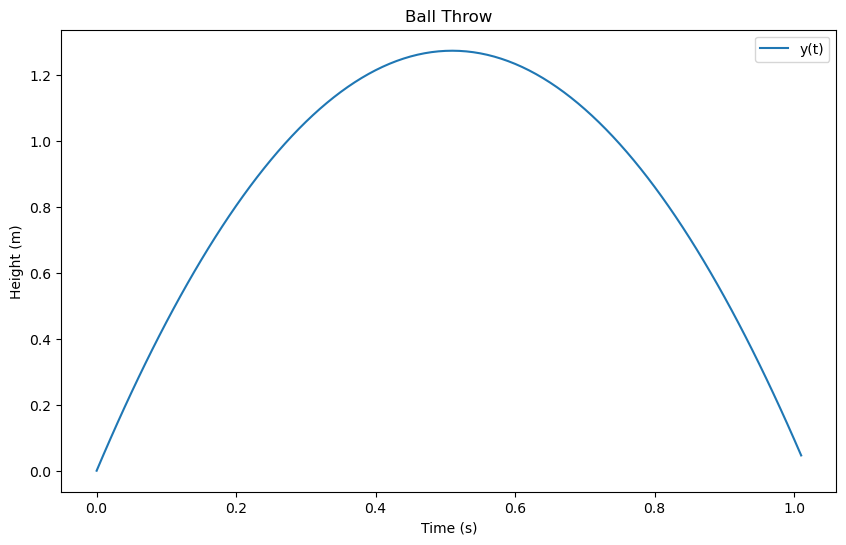

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, y, label='y(t)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Ball Throw')
ax.legend()
plt.show()